# French Movie Analysis

The world is switching gears so fast that even without us realising we have gradually moved from watching movies on television channels to streaming them online! Online streaming services are growing more than ever today and have paved the way for a lot of other streaming providers to join the race. As the war between the online streaming platforms is getting intense, there is a handful of niche content in the entertainment and media industry, still out there, which has viewers looking for something that these big names such as Netflix, Disney+ or Amazon Prime are not offering.

Canopy is one such boutique streaming service that plans to cater to the viewers of French-language movies. Their initial business goals, as a streaming service provider, are:

offer curated selections of best rated French-language movies from the existing content
make French-language movies available to various age groups
identify the least tapped genres so as to provide the filmmakers with data to make original content for Canopy.
You are appointed as the data analyst for Canopy. Your key responsibilities include:

interpreting data, analysing results using the statistical techniques you learned throughout the course.
helping gather insights and understand trends to make decisions by conducting data analysis using python.
deducing results that Canopy can use to inform their business goals.

Your tasks may not be limited to what is laid out in the list here. You might choose to implement more functions so as to come to some concrete conclusions for Canopy. Make sure you make use of the Matplotlib, Seaborn, and visualisation libraries (e.g. Bokeh) for all your tasks.

Canopy wants to find solutions to some broader business problems. Use this set of questions to create your visualisations.

- Does France make longer movies on average based on the runtime?
- Does France make better movies on average based on the ratings?
- Are there any French movies that claim to be of more than one genre? (For eg, Avengers Infinity War is an adventure movie but not comedy, whereas Back to The Future is both.)

[Note: Canopy doesn’t mind if you choose to include the French dubbed movies, at this stage.]

## Import the libraries and data file

In [1]:
# Import the libraries for working with the data and creating visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the movies data file

movies = pd.read_csv('20220525_movieds-1.csv')
movies

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0
...,...,...,...,...,...,...,...,...,...,...
15064,Holiday Rush,2019,7+,4.8,NaN,Leslie Small,"Comedy,Romance",United States,English,92.0
15065,Demolition Man,1993,18+,6.7,59%,Marco Brambilla,"Action,Sci-Fi,Thriller",United States,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,13+,6.4,NaN,Selçuk Aydemir,Comedy,Turkey,Turkish,112.0
15067,Fanney Khan,2018,NaN,4.5,63%,Atul Manjrekar,"Comedy,Drama,Music",India,NaN,130.0


## Explore the data with a view to cleaning it

In [3]:
# Remove duplicate entries from the DataFrame

movies.drop_duplicates()

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0
...,...,...,...,...,...,...,...,...,...,...
15064,Holiday Rush,2019,7+,4.8,NaN,Leslie Small,"Comedy,Romance",United States,English,92.0
15065,Demolition Man,1993,18+,6.7,59%,Marco Brambilla,"Action,Sci-Fi,Thriller",United States,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,13+,6.4,NaN,Selçuk Aydemir,Comedy,Turkey,Turkish,112.0
15067,Fanney Khan,2018,NaN,4.5,63%,Atul Manjrekar,"Comedy,Drama,Music",India,NaN,130.0


In [4]:
# Consider the data (types and non-null counts) and what cleaning / wrangling needs to be performed.

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15069 entries, 0 to 15068
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            15069 non-null  object 
 1   Year             15069 non-null  int64  
 2   Age              6609 non-null   object 
 3   IMDb             14543 non-null  float64
 4   Rotten Tomatoes  4636 non-null   object 
 5   Directors        14396 non-null  object 
 6   Genres           14814 non-null  object 
 7   Country          14672 non-null  object 
 8   Language         14507 non-null  object 
 9   Runtime          14533 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [5]:
movies.isnull().sum()

Title                  0
Year                   0
Age                 8460
IMDb                 526
Rotten Tomatoes    10433
Directors            673
Genres               255
Country              397
Language             562
Runtime              536
dtype: int64

## Visualise the missing data

<Axes: >

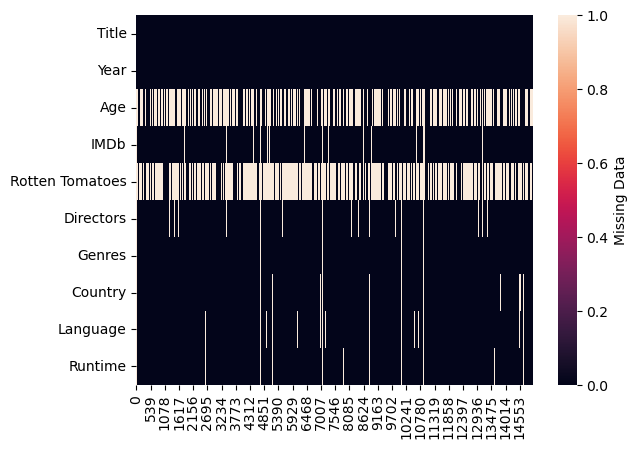

In [6]:
# Display the missing data in a heatmap:

sns.heatmap(movies.isnull().transpose(), cbar_kws={'label': 'Missing Data'})

C:\Users\adamt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


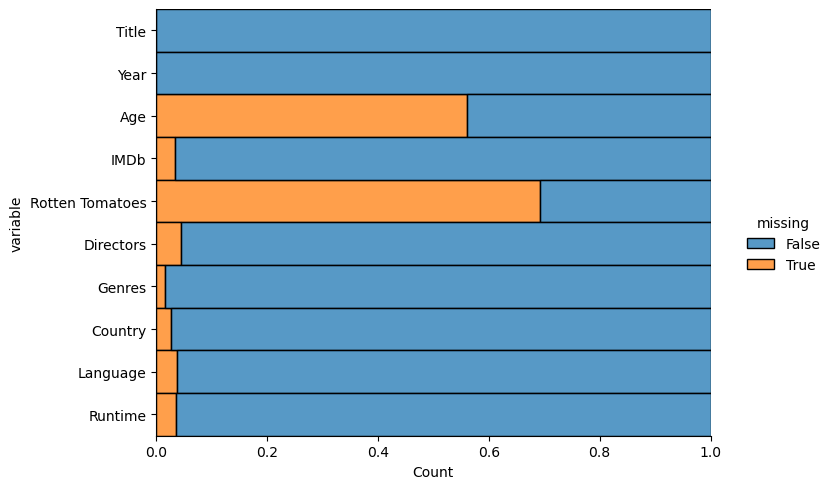

In [7]:
# Thanks to https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
# make a stacked barplot to visualise the missing data by proportion:

sns.displot(data=movies.isnull().melt(value_name="missing"),
           y='variable',
           hue='missing',
           multiple='fill',
           aspect=1.5)

# Note: the sample code from the URL provided above did not work for me initially. 
# I had to read through the documentation for the displot() and melt() functions to understand what was happening,
# and eventually get it to work for me and produce the chart below.

## Decide what to do about the missing values

The purpose of this analysis is to investigate the data with regards to runtime and rating, with consideration of movie genres. 
With the amount of missing data for the Rotten Tomatoes ratings, we will remove the Rotten Tomatoes column.
In the initial stages of this investigation we will not consider the age classification of movies. We can remove the Age column and may return at a later stage to investigate comparisons by age classification.
We can also remove the Directors column.

In [8]:
movies1 = movies.drop(columns=['Age', 'Rotten Tomatoes', 'Directors'])
movies1

,Title,Year,IMDb,Genres,Country,Language,Runtime
0,Trigger Pals,1939,5.3,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,6.2,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,7.4,"Short,Drama",United States,English,11.0
...,...,...,...,...,...,...,...
15064,Holiday Rush,2019,4.8,"Comedy,Romance",United States,English,92.0
15065,Demolition Man,1993,6.7,"Action,Sci-Fi,Thriller",United States,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkey,Turkish,112.0
15067,Fanney Khan,2018,4.5,"Comedy,Drama,Music",India,NaN,130.0


In [9]:
# Remove the 536 rows with Runtime data missing.

movies2 = movies1[movies1['Runtime'].notna()]
movies2

,Title,Year,IMDb,Genres,Country,Language,Runtime
0,Trigger Pals,1939,5.3,"Action,Adventure,Western",United States,English,59.0
2,Open Grave,2013,6.2,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
4,Beyond the Pale,2014,7.4,"Short,Drama",United States,English,11.0
5,White Tiger,1996,5.0,"Action,Adventure,Fantasy,War",Russia,"Russian,German",104.0
6,Path to War,2002,7.3,"Biography,Drama,War",United States,English,165.0
...,...,...,...,...,...,...,...
15064,Holiday Rush,2019,4.8,"Comedy,Romance",United States,English,92.0
15065,Demolition Man,1993,6.7,"Action,Sci-Fi,Thriller",United States,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkey,Turkish,112.0
15067,Fanney Khan,2018,4.5,"Comedy,Drama,Music",India,NaN,130.0


In [10]:
movies2.isnull().sum()

Title         0
Year          0
IMDb        308
Genres       35
Country     122
Language    253
Runtime       0
dtype: int64

In [11]:
# We have options to consider for selecting French movies 
# 1. Movies that have Country = France
# 2. Movies that have Country including France
# 3. Movies that are available in French language

# 1. Select only those movies made in France only. (144 movies)

movies2.loc[movies2['Country'] == 'France']

,Title,Year,IMDb,Genres,Country,Language,Runtime
49,My Revolution,2016,3.5,Drama,France,French,80.0
137,The Fabulous Life Of Elisabeth Vigee Labrun,2018,NaN,"Documentary,Drama,History",France,French,94.0
443,Little Girl,2009,7.1,Documentary,France,French,90.0
559,Nicholas on Holiday,2014,6.2,"Comedy,Family",France,French,97.0
567,The Khufu Pyramid Revealed,2008,NaN,Documentary,France,"English,French",52.0
...,...,...,...,...,...,...,...
14560,The Climb,2017,6.9,"Adventure,Comedy,Romance",France,"French,English,German,Nepali",103.0
14703,Marius,2013,6.7,"Comedy,Drama,Romance",France,French,130.0
14742,Dany de Boon - Des Hauts-De-France,2018,5.8,Comedy,France,French,113.0
14960,Jean Moulin & Klaus Barbie: The Justice of His...,2018,NaN,Documentary,France,French,52.0


In [12]:
# 2. Movies that have Country including France (668 movies)

movies2[movies2['Country'].str.contains("France")==True]

,Title,Year,IMDb,Genres,Country,Language,Runtime
7,Manderlay,2005,7.3,Drama,"Denmark,Sweden,Netherlands,France,Germany,Unit...",English,139.0
31,Mystery of the Pink Dolphin,2015,7.1,Documentary,"France,Brazil","French,English,Portuguese,Dutch",52.0
37,Sherlock Gnomes,2018,5.2,"Animation,Adventure,Comedy,Family,Fantasy,Myst...","United Kingdom,United States,India,Canada,Fran...","English,Mandarin",86.0
49,My Revolution,2016,3.5,Drama,France,French,80.0
78,Girl on a Bicycle,2013,6.2,"Comedy,Drama,Romance","Germany,France","English,French,German,Italian",101.0
...,...,...,...,...,...,...,...
14894,Custer of the West,1967,5.8,"Biography,Drama,History,War,Western","United Kingdom,France,Spain,United States",English,140.0
14948,A Spell to Ward Off the Darkness,2013,6.2,"Documentary,Music","France,Estonia,Germany",English,98.0
14960,Jean Moulin & Klaus Barbie: The Justice of His...,2018,NaN,Documentary,France,French,52.0
15029,Made in France,2015,6.2,"Crime,Drama,Thriller",France,French,89.0


In [13]:
# 3. Movies that are available in French language (713 movies)

movies2[movies2['Language'].str.contains("French")==True]

,Title,Year,IMDb,Genres,Country,Language,Runtime
31,Mystery of the Pink Dolphin,2015,7.1,Documentary,"France,Brazil","French,English,Portuguese,Dutch",52.0
49,My Revolution,2016,3.5,Drama,France,French,80.0
54,The Story of the Twelve Apostles,1999,6.6,"Documentary,Short",United States,"English,French,Spanish",26.0
78,Girl on a Bicycle,2013,6.2,"Comedy,Drama,Romance","Germany,France","English,French,German,Italian",101.0
109,Razzia,2018,6.2,"Drama,History,War","France,Germany,Hungary","French,German,Yiddish",115.0
...,...,...,...,...,...,...,...
15043,Among Dead Men,2008,4.0,"Action,Crime,Horror,Mystery,Sport",Australia,"English,French,Spanish",94.0
15051,The Special Relationship,2010,6.7,"Biography,Drama,History","United Kingdom,United States","English,French",93.0
15058,The Decline,2020,5.9,Thriller,Canada,French,83.0
15060,Michael H. – Profession: Director,2013,7.0,"Documentary,Biography","Austria,France","German,French",92.0


In [14]:
# For this analysis we will consider movies available in French language as French movies, regardless of where they were made.
# We will remove the rows that are missing data for the movie language.

movies3 = movies2[movies2['Language'].notna()]
movies3

,Title,Year,IMDb,Genres,Country,Language,Runtime
0,Trigger Pals,1939,5.3,"Action,Adventure,Western",United States,English,59.0
2,Open Grave,2013,6.2,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
4,Beyond the Pale,2014,7.4,"Short,Drama",United States,English,11.0
5,White Tiger,1996,5.0,"Action,Adventure,Fantasy,War",Russia,"Russian,German",104.0
6,Path to War,2002,7.3,"Biography,Drama,War",United States,English,165.0
...,...,...,...,...,...,...,...
15063,The High Cost of Living,2011,6.8,Drama,Canada,"English,French,Cantonese",92.0
15064,Holiday Rush,2019,4.8,"Comedy,Romance",United States,English,92.0
15065,Demolition Man,1993,6.7,"Action,Sci-Fi,Thriller",United States,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkey,Turkish,112.0


In [15]:
movies3.isnull().sum()

Title         0
Year          0
IMDb        282
Genres       15
Country      41
Language      0
Runtime       0
dtype: int64

In [16]:
# We will remove the Country column as we have defined French movies as those available in French language, regardless of 
# where they were made.
# We also want to compare movies by genre type so we can remove the rows that are missing data for the genre classification.

movies4 = movies3[movies3['Genres'].notna()]
movies5 = movies4.drop(columns=['Country'])

In [17]:
movies5.isnull().sum()

Title         0
Year          0
IMDb        278
Genres        0
Language      0
Runtime       0
dtype: int64

In [18]:
movies5.mean(numeric_only=True).round(1)

Year       2002.7
IMDb          5.9
Runtime      93.7
dtype: float64

In [19]:
movies5.median(numeric_only=True).round(1)

Year       2012.0
IMDb          6.1
Runtime      92.0
dtype: float64

In [20]:
movies5.mode(numeric_only=True).round(1)

,Year,IMDb,Runtime
0,2017,6.5,90.0


To clean the IMDb ratings column, we will replace all missing values in the IMDb column with the mean value of the column.
- IMDb = 5.9

In [21]:
movies5['IMDb'].fillna(value=movies5['IMDb'].mean().round(1), inplace=True)
movies5

,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,"Action,Adventure,Western",English,59.0
2,Open Grave,2013,6.2,"Horror,Mystery,Thriller",English,102.0
4,Beyond the Pale,2014,7.4,"Short,Drama",English,11.0
5,White Tiger,1996,5.0,"Action,Adventure,Fantasy,War","Russian,German",104.0
6,Path to War,2002,7.3,"Biography,Drama,War",English,165.0
...,...,...,...,...,...,...
15063,The High Cost of Living,2011,6.8,Drama,"English,French,Cantonese",92.0
15064,Holiday Rush,2019,4.8,"Comedy,Romance",English,92.0
15065,Demolition Man,1993,6.7,"Action,Sci-Fi,Thriller",English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkish,112.0


In [22]:
movies5.isnull().sum()

Title       0
Year        0
IMDb        0
Genres      0
Language    0
Runtime     0
dtype: int64

## Consider the distribution of movie ratings and runtimes

<Axes: >

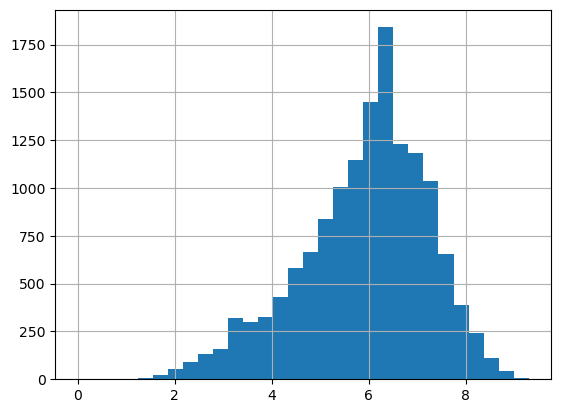

In [23]:
# Create a histogram of IMDb rating data to view the distribution

movies5['IMDb'].hist(bins=30)

In [24]:
# Run descriptive statistics of the distribution

movies5['IMDb'].describe().round(1)

count    14265.0
mean         5.9
std          1.3
min          0.0
25%          5.1
50%          6.1
75%          6.9
max          9.3
Name: IMDb, dtype: float64

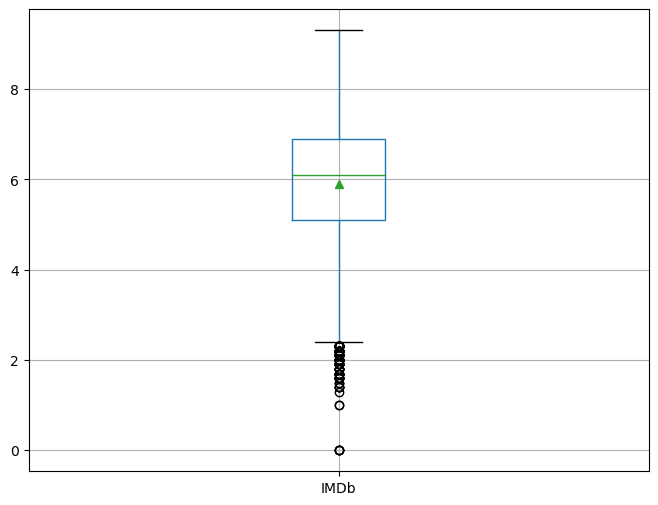

In [25]:
# Create a boxplot to look for ourliers.

ax = movies5.boxplot(column=['IMDb'], figsize=(8, 6), showmeans=True, grid=True)

<Axes: >

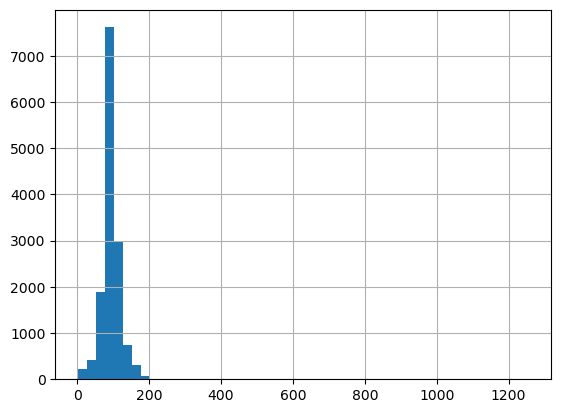

In [26]:
# Create a histogram of Runtime data to view the distribution

movies5['Runtime'].hist(bins=50)

In [27]:
# Run descriptive statistics of the distribution

movies5['Runtime'].describe().round(1)

count    14265.0
mean        93.7
std         28.2
min          1.0
25%         83.0
50%         92.0
75%        104.0
max       1256.0
Name: Runtime, dtype: float64

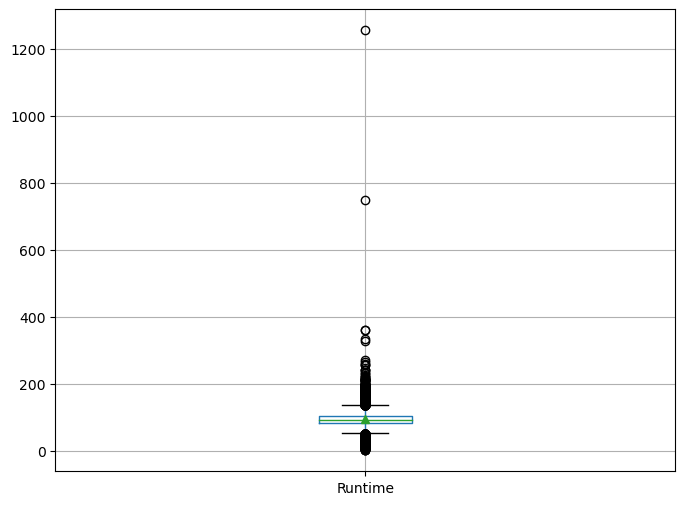

In [28]:
# From the histogram and data above it is obvious that there are some unusually high runtimes in the dataset.
# Create a boxplot to view distribution of Runtimes, looking for outliers
# An outlier is a data point that is far from other data points, and can distort results.

ax = movies5.boxplot(column=['Runtime'], figsize=(8, 6), showmeans=True, grid=True)

In [29]:
# There are some unusually long movies in the dataset!

movies5.sort_values(by = ['Runtime'], ascending=False).head(10)

,Title,Year,IMDb,Genres,Language,Runtime
7193,Colorado,1940,5.9,"Action,Adventure,Drama,Romance,Western",English,1256.0
2166,Law of the Lawless,1964,6.1,"Action,Crime,Drama",Russian,750.0
5545,Scarlett,2016,4.4,"Drama,Romance",English,360.0
12624,The Inner Circle,2009,6.6,Drama,Swedish,360.0
14406,Carlos el terrorista,1980,6.1,"Biography,Crime,Drama,Thriller","English,Arabic,German,Spanish,French,Hungarian...",334.0
12718,Custer's Last Stand,1936,4.6,"Adventure,History,Romance,War,Western",English,328.0
10228,Gone,2012,5.9,"Drama,Mystery",English,270.0
9836,Dina,2017,6.8,"Adventure,Drama,Fantasy,Sci-Fi","English,Italian",265.0
10657,The Greatest Story Ever Told,1965,6.6,"Biography,Drama,History",English,260.0
8812,Foods That Cure Disease,2018,5.5,Documentary,English,256.0


We see a maximum movie runtime in the data set of 1256 minutes.
In order to decide what to do with these unusually long runtimes, search the online movie databases to compare runtime data.
I compared the longest 10 from this dataset, and found:

1. Colorado = 57 minutes (compared to 1256 minutes given in the dataset)
2. Law of the Lawless = 87 minutes (compared to 750 minutes given in the dataset)
3. Scarlett = 92 minutes (compared to 360 minutes given in the dataset)
4. The Inner Circle = 96 minutes (compared to 360 minutes given in the dataset)
5. Carlos el terrorista = 97 minutes (compared to 334 minutes given in the dataset)
6. Custer's Last Stand = 84 minutes (compared to 328 minutes given in the dataset)
7. Gone = 95 minutes (compared to 270 minutes given in the dataset)
8. Dina = 101 minutes (compared to 265 minutes given in the dataset)
9. The Greatest Story Ever Told = 260 minutes = A MATCH!!
10. Food That Cure Disease = 256 minutes = A MATCH!!

Two of the Runtimes provided are correct, the other eight distort the results.
It is uncertain how many of the other entries contain false Runtime data.
As it seems infeasible to validate all entries in this dataset, corrections to the longest 10 will be made as required,  and 
analysis will be conducted from that point on as though the data is correct.

In [30]:
# Update the records as required
movies5.at[7193, 'Runtime']=57
movies5.at[2166, 'Runtime']=87
movies5.at[5545, 'Runtime']=92
movies5.at[12624, 'Runtime']=96
movies5.at[14406, 'Runtime']=97
movies5.at[12718, 'Runtime']=84
movies5.at[10228, 'Runtime']=95
movies5.at[9836, 'Runtime']=101

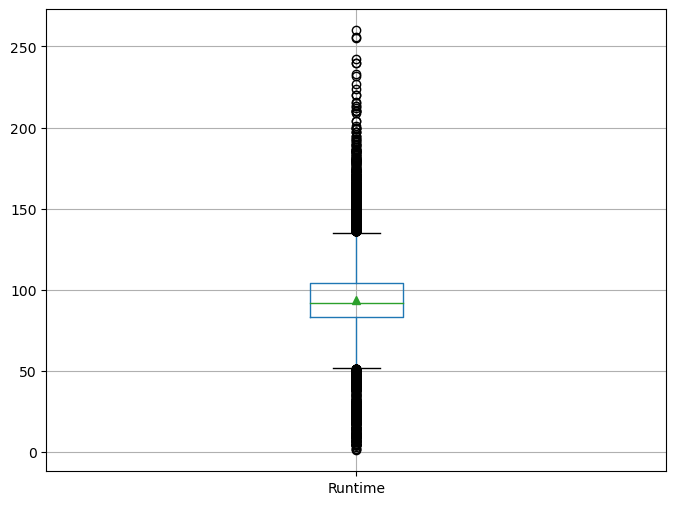

In [31]:
# Now check the distribution 

ax = movies5.boxplot(column=['Runtime'], figsize=(8, 6), showmeans=True, grid=True)

<Axes: >

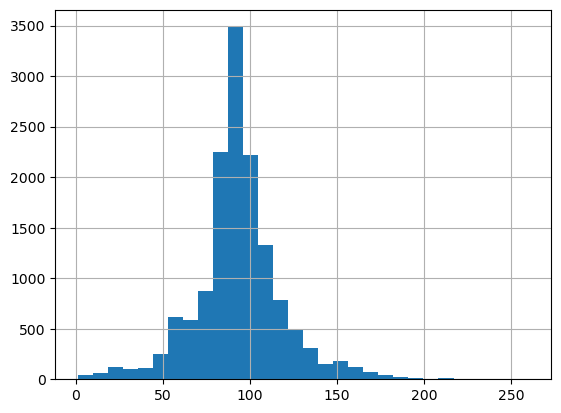

In [32]:
movies5['Runtime'].hist(bins=30)

In [33]:
# Check the descriptive stats again to see the changes.

movies5['Runtime'].describe().round(1)

count    14265.0
mean        93.5
std         25.5
min          1.0
25%         83.0
50%         92.0
75%        104.0
max        260.0
Name: Runtime, dtype: float64

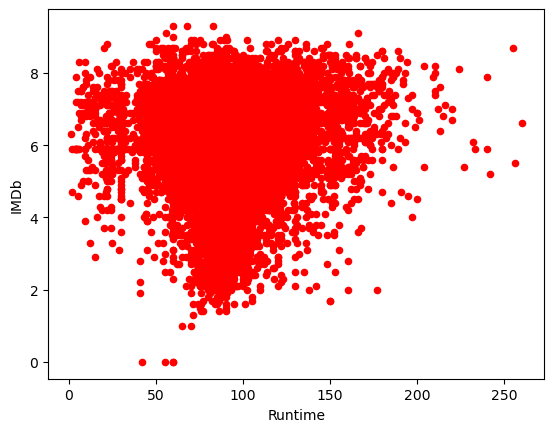

In [34]:
# the statistics changed a small amount. This may not seem significant overall, however it may be an important consideration
# when we slice the data to compare categories.

# create scatter plot of Runtime vs. IMDb rating, see if there is any correlation (doesn't appear to be).
# a scatter plot is also another way of loking for outliers.

ax1=movies5.plot(kind='scatter', x='Runtime', y='IMDb', color='r')

## Separate the French from the Not French

In [35]:
# For this analysis we will consider movies available in French language as French movies, regardless of where they were made.

French_Movies = movies5[movies5['Language'].str.contains("French")==True]
French_Movies

,Title,Year,IMDb,Genres,Language,Runtime
31,Mystery of the Pink Dolphin,2015,7.1,Documentary,"French,English,Portuguese,Dutch",52.0
49,My Revolution,2016,3.5,Drama,French,80.0
54,The Story of the Twelve Apostles,1999,6.6,"Documentary,Short","English,French,Spanish",26.0
78,Girl on a Bicycle,2013,6.2,"Comedy,Drama,Romance","English,French,German,Italian",101.0
109,Razzia,2018,6.2,"Drama,History,War","French,German,Yiddish",115.0
...,...,...,...,...,...,...
15043,Among Dead Men,2008,4.0,"Action,Crime,Horror,Mystery,Sport","English,French,Spanish",94.0
15051,The Special Relationship,2010,6.7,"Biography,Drama,History","English,French",93.0
15058,The Decline,2020,5.9,Thriller,French,83.0
15060,Michael H. – Profession: Director,2013,7.0,"Documentary,Biography","German,French",92.0


In [36]:
# Movies that are not available in French language:

Not_French = movies5[movies5['Language'].str.contains("French")!=True]
Not_French

,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,"Action,Adventure,Western",English,59.0
2,Open Grave,2013,6.2,"Horror,Mystery,Thriller",English,102.0
4,Beyond the Pale,2014,7.4,"Short,Drama",English,11.0
5,White Tiger,1996,5.0,"Action,Adventure,Fantasy,War","Russian,German",104.0
6,Path to War,2002,7.3,"Biography,Drama,War",English,165.0
...,...,...,...,...,...,...
15062,Freezer's Campaign,2016,5.9,"Comedy,Drama","English,Italian,Arabic",123.0
15064,Holiday Rush,2019,4.8,"Comedy,Romance",English,92.0
15065,Demolition Man,1993,6.7,"Action,Sci-Fi,Thriller",English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkish,112.0


In [37]:
# Run descpritive stats to find average movie runtime and rating (IMDb rating) for movies available in French

French_Movies.describe().round(1)

,Year,IMDb,Runtime
count,713.0,713.0,713.0
mean,2005.4,6.4,100.5
std,18.7,1.0,23.3
min,1920.0,2.3,13.0
25%,2004.0,5.9,90.0
50%,2013.0,6.5,99.0
75%,2016.0,7.0,113.0
max,2020.0,8.8,195.0


In [38]:
# French movies have a mean IMDb rating of 6.4, and
# French movies have a mean runtime of 100.5 minutes

# Run descpritive stats to find average movie runtime and rating (IMDb rating) for movies not available in French

Not_French.describe().round(1)

,Year,IMDb,Runtime
count,13552.0,13552.0,13552.0
mean,2002.6,5.9,93.2
std,20.9,1.3,25.6
min,1913.0,0.0,1.0
25%,1999.0,5.1,82.0
50%,2012.0,6.0,92.0
75%,2016.0,6.9,104.0
max,2020.0,9.3,260.0


Text(0.5, 1.0, 'Who Makes Longer Movies?')

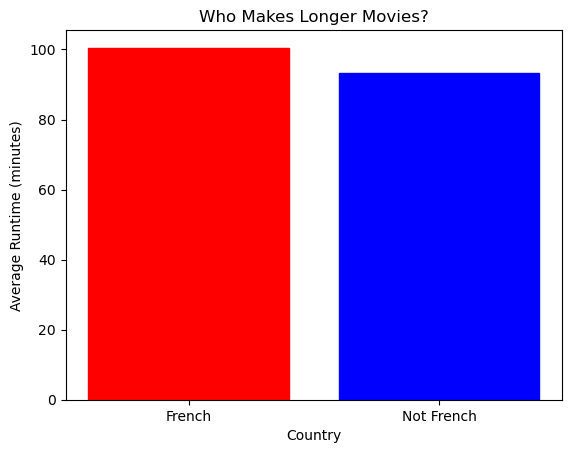

In [39]:
# Non-French movies have a mean IMDb rating of 5.9, and
# Non-French movies have a mean runtime of 93.2 minutes.

# Use data from descriptive stats to generate charts to compare data for average runtime and IMDb ratings
# Create the plots
fig, ax = plt.subplots()

# Create a bar plot for average movie length
bars = ax.bar(['French', 'Not French'], [100.5, 93.2])

# Set the colours
bars[0].set_color("red")
bars[1].set_color("blue")

# Specify the title and axis labels
ax.set_xlabel("Country")
ax.set_ylabel("Average Runtime (minutes)")
ax.set_title("Who Makes Longer Movies?")

Text(0.5, 1.0, 'Who Makes Better Movies?')

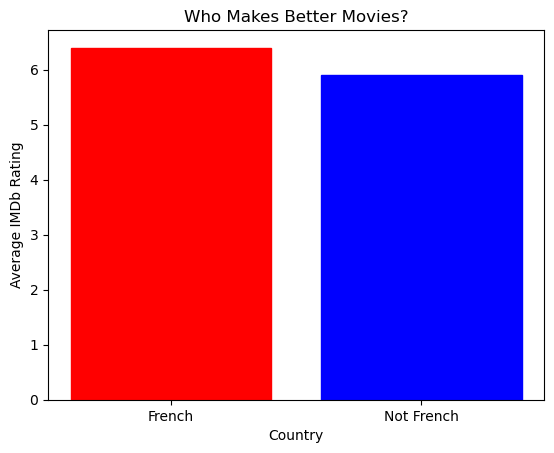

In [40]:
# Create the plots
fig, ax = plt.subplots()

# Create a bar plot for average movie rating (IMDb)
bars = ax.bar(['French', 'Not French'], [6.4, 5.9])

# Set the colours
bars[0].set_color("red")
bars[1].set_color("blue")

# Specify the title and axis labels
ax.set_xlabel("Country")
ax.set_ylabel("Average IMDb Rating")
ax.set_title("Who Makes Better Movies?")

## Who makes better movies? / Who makes longer movies?

Based on the above broad stroke analysis we can say that:
1. French movies are longer than non-French movies, on average, and;
2. French movies are better than non-French movies, on average.

## Let's break it down by Movie genre classification

In [41]:
# Considering the third business question for this analysis:
# Are there any French movies that claim to be of more than one genre?

French_Movies.groupby(['Genres'])["Runtime"].count().sort_values(ascending=False).nlargest(10)

Genres
Drama                    67
Documentary              55
Comedy,Drama             31
Drama,Romance            31
Comedy                   22
Comedy,Drama,Romance     21
Documentary,Biography    12
Drama,Thriller           12
Thriller                 10
Drama,War                 9
Name: Runtime, dtype: int64

# yes. 
From the above table we can see that many films in French claim to be of more than one genre.
There are 275 different genre combinations.
The top genre combination (for movies with more than one genre) is __Comedy, Drama__ for both French and Not_French movies.
__Drama, Romance__ ties for top with French movies and runs a close second place for Not_French movies.

Below are curated lists of the Top 20 movies (as rated in IMDb) for genre combinations:
__Comedy, Drama__ and __Drama, Romance__.

In [42]:
French_Movies.loc[French_Movies['Genres']=='Comedy,Drama'].sort_values(['IMDb'], ascending=[False]).head(20)

,Title,Year,IMDb,Genres,Language,Runtime
1011,The Two Popes,2019,7.6,"Comedy,Drama","English,Spanish,Italian,Latin,Portuguese,Frenc...",125.0
10185,Sidewalls,2011,7.5,"Comedy,Drama","Spanish,French,English,Italian,German",95.0
2373,The Hundred-Foot Journey,2014,7.3,"Comedy,Drama","English,French",122.0
4786,The Decline of the American Empire,1986,7.2,"Comedy,Drama","French,English",101.0
424,Aaltra,2004,7.1,"Comedy,Drama","English,Finnish,French,German,Dutch",92.0
14220,House of D,2004,7.0,"Comedy,Drama","English,French",97.0
11376,Somers Town,2008,6.9,"Comedy,Drama","English,Polish,French",71.0
6373,Back to Burgundy,2017,6.9,"Comedy,Drama","French,English,Spanish",113.0
13394,Nothing to Hide,2018,6.8,"Comedy,Drama",French,90.0
2044,Bottle Shock,2008,6.8,"Comedy,Drama","English,French,German",110.0


In [43]:
French_Movies.loc[French_Movies['Genres']=='Drama,Romance'].sort_values(['IMDb'], ascending=[False]).head(20)

,Title,Year,IMDb,Genres,Language,Runtime
2237,Portrait of a Lady on Fire,2019,8.2,"Drama,Romance","French,Italian",122.0
2149,Blue Is the Warmest Color,2013,7.7,"Drama,Romance","French,English",180.0
13280,Laurence Anyways,2012,7.7,"Drama,Romance","French,English,Latin",168.0
6636,Room at the Top,1959,7.5,"Drama,Romance","French,English",117.0
2516,Love Likes Coincidences,2011,7.3,"Drama,Romance","Turkish,French",118.0
11115,My Favorite Season,1993,7.1,"Drama,Romance",French,127.0
6763,Lady J,2018,6.9,"Drama,Romance",French,109.0
10644,Under The Greenwood Tree,2005,6.9,"Drama,Romance","English,French",93.0
4477,Beyond the Clouds,2018,6.9,"Drama,Romance","French,English,Italian",110.0
11016,Felix and Meira,2015,6.7,"Drama,Romance","French,Yiddish,English,Spanish,Hebrew,Italian",105.0


In [44]:
# As for the non-French movies, we find 1712 different genre combinations:

Not_French.groupby(['Genres'])["Runtime"].count().sort_values(ascending=False).nlargest(10)

Genres
Drama                   1077
Documentary             1003
Comedy                   843
Horror                   377
Comedy,Drama             361
Drama,Romance            310
Comedy,Drama,Romance     276
Comedy,Romance           259
Horror,Thriller          258
Drama,Thriller           188
Name: Runtime, dtype: int64

In [45]:
# We have answered the business questions in a broad sense.
# Now let's turn out attention to who makes longer and better movies by category.
# To achieve this we will explode the two DataFrames by the genres column and compare French vs Not French by Genre.

French_Movies["Genres"] = French_Movies["Genres"].str.split(",")
French_Movies

C:\Users\adamt\AppData\Local\Temp\ipykernel_14856\1189991956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  French_Movies["Genres"] = French_Movies["Genres"].str.split(",")


,Title,Year,IMDb,Genres,Language,Runtime
31,Mystery of the Pink Dolphin,2015,7.1,[Documentary],"French,English,Portuguese,Dutch",52.0
49,My Revolution,2016,3.5,[Drama],French,80.0
54,The Story of the Twelve Apostles,1999,6.6,"[Documentary, Short]","English,French,Spanish",26.0
78,Girl on a Bicycle,2013,6.2,"[Comedy, Drama, Romance]","English,French,German,Italian",101.0
109,Razzia,2018,6.2,"[Drama, History, War]","French,German,Yiddish",115.0
...,...,...,...,...,...,...
15043,Among Dead Men,2008,4.0,"[Action, Crime, Horror, Mystery, Sport]","English,French,Spanish",94.0
15051,The Special Relationship,2010,6.7,"[Biography, Drama, History]","English,French",93.0
15058,The Decline,2020,5.9,[Thriller],French,83.0
15060,Michael H. – Profession: Director,2013,7.0,"[Documentary, Biography]","German,French",92.0


In [46]:
FMG = French_Movies.explode("Genres")
FMG

,Title,Year,IMDb,Genres,Language,Runtime
31,Mystery of the Pink Dolphin,2015,7.1,Documentary,"French,English,Portuguese,Dutch",52.0
49,My Revolution,2016,3.5,Drama,French,80.0
54,The Story of the Twelve Apostles,1999,6.6,Documentary,"English,French,Spanish",26.0
54,The Story of the Twelve Apostles,1999,6.6,Short,"English,French,Spanish",26.0
78,Girl on a Bicycle,2013,6.2,Comedy,"English,French,German,Italian",101.0
...,...,...,...,...,...,...
15051,The Special Relationship,2010,6.7,History,"English,French",93.0
15058,The Decline,2020,5.9,Thriller,French,83.0
15060,Michael H. – Profession: Director,2013,7.0,Documentary,"German,French",92.0
15060,Michael H. – Profession: Director,2013,7.0,Biography,"German,French",92.0


In [47]:
Not_French

,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,"Action,Adventure,Western",English,59.0
2,Open Grave,2013,6.2,"Horror,Mystery,Thriller",English,102.0
4,Beyond the Pale,2014,7.4,"Short,Drama",English,11.0
5,White Tiger,1996,5.0,"Action,Adventure,Fantasy,War","Russian,German",104.0
6,Path to War,2002,7.3,"Biography,Drama,War",English,165.0
...,...,...,...,...,...,...
15062,Freezer's Campaign,2016,5.9,"Comedy,Drama","English,Italian,Arabic",123.0
15064,Holiday Rush,2019,4.8,"Comedy,Romance",English,92.0
15065,Demolition Man,1993,6.7,"Action,Sci-Fi,Thriller",English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkish,112.0


In [48]:
Not_French["Genres"] = Not_French["Genres"].str.split(",")
Not_French

C:\Users\adamt\AppData\Local\Temp\ipykernel_14856\967523199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Not_French["Genres"] = Not_French["Genres"].str.split(",")


,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,"[Action, Adventure, Western]",English,59.0
2,Open Grave,2013,6.2,"[Horror, Mystery, Thriller]",English,102.0
4,Beyond the Pale,2014,7.4,"[Short, Drama]",English,11.0
5,White Tiger,1996,5.0,"[Action, Adventure, Fantasy, War]","Russian,German",104.0
6,Path to War,2002,7.3,"[Biography, Drama, War]",English,165.0
...,...,...,...,...,...,...
15062,Freezer's Campaign,2016,5.9,"[Comedy, Drama]","English,Italian,Arabic",123.0
15064,Holiday Rush,2019,4.8,"[Comedy, Romance]",English,92.0
15065,Demolition Man,1993,6.7,"[Action, Sci-Fi, Thriller]",English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,[Comedy],Turkish,112.0


In [49]:
NFG = Not_French.explode("Genres")
NFG

,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,Action,English,59.0
0,Trigger Pals,1939,5.3,Adventure,English,59.0
0,Trigger Pals,1939,5.3,Western,English,59.0
2,Open Grave,2013,6.2,Horror,English,102.0
2,Open Grave,2013,6.2,Mystery,English,102.0
...,...,...,...,...,...,...
15065,Demolition Man,1993,6.7,Thriller,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkish,112.0
15068,Off Label,2013,5.2,Documentary,English,80.0
15068,Off Label,2013,5.2,Drama,English,80.0


In [50]:
french_genres = FMG.groupby(['Genres'])['Runtime'].describe().round(1)
french_genres

,count,mean,std,min,25%,50%,75%,max
Genres,,,,,,,,
Action,100.0,111.7,21.6,44.0,94.8,111.0,124.2,164.0
Adventure,95.0,102.6,24.6,26.0,86.0,100.0,118.0,158.0
Animation,42.0,79.3,24.3,13.0,71.2,80.0,94.0,128.0
Biography,60.0,108.0,25.9,45.0,93.0,107.5,122.0,195.0
Comedy,171.0,98.0,20.0,13.0,90.0,98.0,109.5,174.0
Crime,82.0,103.9,20.9,52.0,93.0,102.0,115.8,189.0
Documentary,100.0,83.0,20.0,26.0,73.8,87.5,94.0,128.0
Drama,426.0,105.9,22.2,14.0,92.0,103.0,117.0,195.0
Family,63.0,90.0,22.0,13.0,79.0,92.0,104.5,130.0


In [51]:
not_french_genres = NFG.groupby(['Genres'])['Runtime'].describe().round(1)
not_french_genres

,count,mean,std,min,25%,50%,75%,max
Genres,,,,,,,,
Action,2230.0,99.7,26.8,5.0,87.0,94.0,110.0,227.0
Adventure,1446.0,92.1,23.6,7.0,82.0,91.0,101.0,227.0
Animation,554.0,73.4,27.1,5.0,65.0,79.0,91.0,185.0
Biography,656.0,100.5,25.9,6.0,88.0,99.0,115.0,260.0
Comedy,3862.0,92.0,25.1,2.0,82.0,91.0,102.0,220.0
Crime,1525.0,97.9,23.2,8.0,87.0,95.0,108.0,227.0
Documentary,2101.0,80.7,23.4,6.0,65.0,83.0,93.0,256.0
Drama,5872.0,101.0,25.8,4.0,89.0,97.0,112.0,260.0
Family,1261.0,87.4,26.4,5.0,78.0,90.0,99.0,192.0


In [52]:
french_genre_rating = FMG.groupby(['Genres'])['IMDb'].describe().round(1)
french_genre_rating

,count,mean,std,min,25%,50%,75%,max
Genres,,,,,,,,
Action,100.0,6.1,1.1,2.3,5.6,6.2,6.8,8.8
Adventure,95.0,6.4,1.1,3.6,5.8,6.6,7.2,8.8
Animation,42.0,6.8,1.0,4.2,6.3,7.0,7.4,8.6
Biography,60.0,6.8,0.6,5.3,6.6,6.9,7.2,8.3
Comedy,171.0,6.3,0.9,3.5,5.8,6.3,6.9,8.6
Crime,82.0,6.3,0.9,3.6,5.8,6.3,6.9,8.6
Documentary,100.0,6.9,0.8,4.9,6.4,7.0,7.4,8.6
Drama,426.0,6.3,0.9,3.0,5.9,6.5,7.0,8.6
Family,63.0,6.6,0.9,4.2,6.1,6.7,7.2,8.6


In [53]:
not_french_genre_rating = NFG.groupby(['Genres'])['IMDb'].describe().round(1)
not_french_genre_rating

,count,mean,std,min,25%,50%,75%,max
Genres,,,,,,,,
Action,2230.0,5.4,1.4,1.3,4.5,5.6,6.5,8.7
Adventure,1446.0,5.6,1.5,1.5,4.7,5.7,6.7,8.7
Animation,554.0,6.2,1.2,1.6,5.5,6.3,7.1,8.8
Biography,656.0,6.8,0.9,2.0,6.4,7.0,7.4,9.0
Comedy,3862.0,5.9,1.2,1.3,5.2,6.0,6.8,9.3
Crime,1525.0,5.9,1.2,1.5,5.1,5.9,6.7,8.7
Documentary,2101.0,6.9,1.0,0.0,6.4,7.0,7.5,9.3
Drama,5872.0,6.1,1.2,1.4,5.4,6.2,6.9,9.3
Family,1261.0,6.0,1.2,1.4,5.3,6.0,6.9,9.1


In [54]:
# Combine the dataframe created to compare and plot data for rating by genres for French and non-French movies

rating_by_genre = french_genre_rating.merge(not_french_genre_rating, on='Genres', how='outer')
rating_by_genre.rename(columns={'count_x': 'French Count', 'mean_x': 'mean French Rating',
                               'count_y': 'Not French Count', 'mean_y': 'mean Not French Rating'},
                      inplace=True)
rating_by_genre = rating_by_genre.reset_index()
rating_by_genre.fillna(0, inplace=True)
rating_by_genre

,Genres,French Count,mean French Rating,std_x,min_x,25%_x,50%_x,75%_x,max_x,Not French Count,mean Not French Rating,std_y,min_y,25%_y,50%_y,75%_y,max_y
0,Action,100.0,6.1,1.1,2.3,5.6,6.2,6.8,8.8,2230.0,5.4,1.4,1.3,4.5,5.6,6.5,8.7
1,Adventure,95.0,6.4,1.1,3.6,5.8,6.6,7.2,8.8,1446.0,5.6,1.5,1.5,4.7,5.7,6.7,8.7
2,Animation,42.0,6.8,1.0,4.2,6.3,7.0,7.4,8.6,554.0,6.2,1.2,1.6,5.5,6.3,7.1,8.8
3,Biography,60.0,6.8,0.6,5.3,6.6,6.9,7.2,8.3,656.0,6.8,0.9,2.0,6.4,7.0,7.4,9.0
4,Comedy,171.0,6.3,0.9,3.5,5.8,6.3,6.9,8.6,3862.0,5.9,1.2,1.3,5.2,6.0,6.8,9.3
5,Crime,82.0,6.3,0.9,3.6,5.8,6.3,6.9,8.6,1525.0,5.9,1.2,1.5,5.1,5.9,6.7,8.7
6,Documentary,100.0,6.9,0.8,4.9,6.4,7.0,7.4,8.6,2101.0,6.9,1.0,0.0,6.4,7.0,7.5,9.3
7,Drama,426.0,6.3,0.9,3.0,5.9,6.5,7.0,8.6,5872.0,6.1,1.2,1.4,5.4,6.2,6.9,9.3
8,Family,63.0,6.6,0.9,4.2,6.1,6.7,7.2,8.6,1261.0,6.0,1.2,1.4,5.3,6.0,6.9,9.1
9,Fantasy,57.0,6.5,1.2,3.3,5.9,6.6,7.3,8.6,903.0,5.6,1.5,1.3,4.7,5.8,6.7,8.8


In [55]:
rating_by_genre.drop(columns = ['std_x','min_x', '25%_x', '50%_x', '75%_x', 'max_x', 
                                'std_y', 'min_y', '25%_y', '50%_y', '75%_y', 'max_y'])


,Genres,French Count,mean French Rating,Not French Count,mean Not French Rating
0,Action,100.0,6.1,2230.0,5.4
1,Adventure,95.0,6.4,1446.0,5.6
2,Animation,42.0,6.8,554.0,6.2
3,Biography,60.0,6.8,656.0,6.8
4,Comedy,171.0,6.3,3862.0,5.9
5,Crime,82.0,6.3,1525.0,5.9
6,Documentary,100.0,6.9,2101.0,6.9
7,Drama,426.0,6.3,5872.0,6.1
8,Family,63.0,6.6,1261.0,6.0
9,Fantasy,57.0,6.5,903.0,5.6


In [56]:
# Combine the dataframe created to compare and plot data for runtime by genres for French and non-French movies.

runtime_by_genre = french_genres.merge(not_french_genres, on='Genres', how='outer')
runtime_by_genre.rename(columns={'count_x': 'French_Count', 'mean_x': 'mean_French_Runtime',
                               'count_y': 'Not_French_Count', 'mean_y': 'mean_Not_French_Runtime'},
                      inplace=True)
runtime_by_genre.fillna(0, inplace=True)
runtime_by_genre = runtime_by_genre.reset_index()
runtime_by_genre.drop(columns = ['std_x','min_x', '25%_x', '50%_x', '75%_x', 'max_x', 
                                'std_y', 'min_y', '25%_y', '50%_y', '75%_y', 'max_y'])

,Genres,French_Count,mean_French_Runtime,Not_French_Count,mean_Not_French_Runtime
0,Action,100.0,111.7,2230.0,99.7
1,Adventure,95.0,102.6,1446.0,92.1
2,Animation,42.0,79.3,554.0,73.4
3,Biography,60.0,108.0,656.0,100.5
4,Comedy,171.0,98.0,3862.0,92.0
5,Crime,82.0,103.9,1525.0,97.9
6,Documentary,100.0,83.0,2101.0,80.7
7,Drama,426.0,105.9,5872.0,101.0
8,Family,63.0,90.0,1261.0,87.4
9,Fantasy,57.0,94.1,903.0,92.2


Up to this point the data has been sliced down to compare data for 'French' and 'Not French' movies.
We can see in the tables the data that answers our questions regarding who makes better and longer films by genre, however
it has become increasingly difficult for me to obtain the results that I desire in terms of plotting neatly and efficiently.
After learning more about the seaborn library and the way it works, it is obvious that I have sliced the dataframe too much.
I will now attempt to go back to an earlier step and let seaborn do much of the heavy lifting for slicing and analysis.
It seems to me that all I need to do is explode the dataframe by Genres and specify whether the movie is French or not.

In [57]:
movies5

,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,"Action,Adventure,Western",English,59.0
2,Open Grave,2013,6.2,"Horror,Mystery,Thriller",English,102.0
4,Beyond the Pale,2014,7.4,"Short,Drama",English,11.0
5,White Tiger,1996,5.0,"Action,Adventure,Fantasy,War","Russian,German",104.0
6,Path to War,2002,7.3,"Biography,Drama,War",English,165.0
...,...,...,...,...,...,...
15063,The High Cost of Living,2011,6.8,Drama,"English,French,Cantonese",92.0
15064,Holiday Rush,2019,4.8,"Comedy,Romance",English,92.0
15065,Demolition Man,1993,6.7,"Action,Sci-Fi,Thriller",English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkish,112.0


In [58]:
movies5.isnull().sum()

Title       0
Year        0
IMDb        0
Genres      0
Language    0
Runtime     0
dtype: int64

In [59]:
movies5.describe().round(1)

,Year,IMDb,Runtime
count,14265.0,14265.0,14265.0
mean,2002.7,5.9,93.5
std,20.8,1.3,25.5
min,1913.0,0.0,1.0
25%,2000.0,5.1,83.0
50%,2012.0,6.1,92.0
75%,2016.0,6.9,104.0
max,2020.0,9.3,260.0


In [60]:
movies5['Genres']=movies5['Genres'].str.split(",")
movies5

,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,"[Action, Adventure, Western]",English,59.0
2,Open Grave,2013,6.2,"[Horror, Mystery, Thriller]",English,102.0
4,Beyond the Pale,2014,7.4,"[Short, Drama]",English,11.0
5,White Tiger,1996,5.0,"[Action, Adventure, Fantasy, War]","Russian,German",104.0
6,Path to War,2002,7.3,"[Biography, Drama, War]",English,165.0
...,...,...,...,...,...,...
15063,The High Cost of Living,2011,6.8,[Drama],"English,French,Cantonese",92.0
15064,Holiday Rush,2019,4.8,"[Comedy, Romance]",English,92.0
15065,Demolition Man,1993,6.7,"[Action, Sci-Fi, Thriller]",English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,[Comedy],Turkish,112.0


In [61]:
movies6 = movies5.explode("Genres")
movies6

,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,Action,English,59.0
0,Trigger Pals,1939,5.3,Adventure,English,59.0
0,Trigger Pals,1939,5.3,Western,English,59.0
2,Open Grave,2013,6.2,Horror,English,102.0
2,Open Grave,2013,6.2,Mystery,English,102.0
...,...,...,...,...,...,...
15065,Demolition Man,1993,6.7,Thriller,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Turkish,112.0
15068,Off Label,2013,5.2,Documentary,English,80.0
15068,Off Label,2013,5.2,Drama,English,80.0


## Separate the French from the Not-French

In [62]:
# If the movie is available in French we want it to list as a French movie for this analysis.
# If not, then list as Not French.

movies6.loc[movies6["Language"].str.contains("French")==True, "Language"] = 'French'
movies6.loc[movies6["Language"].str.contains("French")!=True, "Language"] = 'Not_French'
movies6

,Title,Year,IMDb,Genres,Language,Runtime
0,Trigger Pals,1939,5.3,Action,Not_French,59.0
0,Trigger Pals,1939,5.3,Adventure,Not_French,59.0
0,Trigger Pals,1939,5.3,Western,Not_French,59.0
2,Open Grave,2013,6.2,Horror,Not_French,102.0
2,Open Grave,2013,6.2,Mystery,Not_French,102.0
...,...,...,...,...,...,...
15065,Demolition Man,1993,6.7,Thriller,Not_French,115.0
15066,Düğün Dernek 2: Sünnet,2015,6.4,Comedy,Not_French,112.0
15068,Off Label,2013,5.2,Documentary,Not_French,80.0
15068,Off Label,2013,5.2,Drama,Not_French,80.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Western'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Mystery'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Short'),
  Text(7, 0, 'Drama'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'War'),
  Text(10, 0, 'Biography'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Crime'),
  Text(13, 0, 'Documentary'),
  Text(14, 0, 'History'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'Family'),
  Text(17, 0, 'Comedy'),
  Text(18, 0, 'Sci-Fi'),
  Text(19, 0, 'Music'),
  Text(20, 0, 'Sport'),
  Text(21, 0, 'Film-Noir'),
  Text(22, 0, 'Musical'),
  Text(23, 0, 'News'),
  Text(24, 0, 'Game-Show'),
  Text(25, 0, 'Reality-TV'),
  Text(26, 0, 'Talk-Show')])

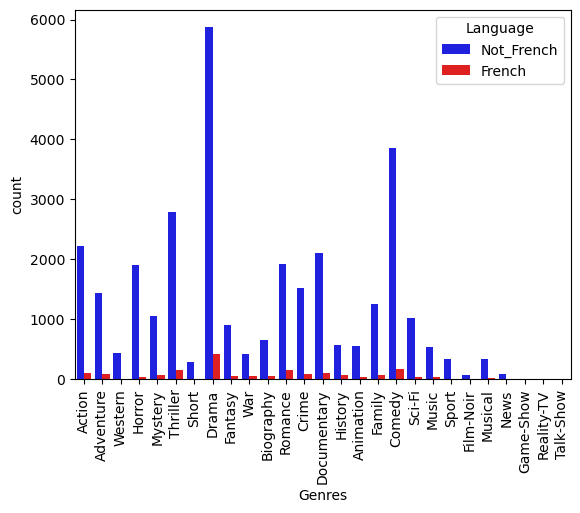

In [63]:
# Create a countplot to show the distribution of genres for French and Not-French films.

sns.countplot(x='Genres', hue="Language", data=movies6, palette={"French": "r", "Not_French": "b"})
plt.xticks(rotation=90)

When comparing the two distrubutions (in the figure above and the maerged data tables previously), three items can be seen:
1. There are many more Not-French films in the dataset than French films,
2. Compared with the Not-French distribution, French films are under-represented in Action and Horror movies, and
3. There are no French films in four genre categories.

## Compare Runtime by Genre: Who makes Longer Movies?

C:\Users\adamt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


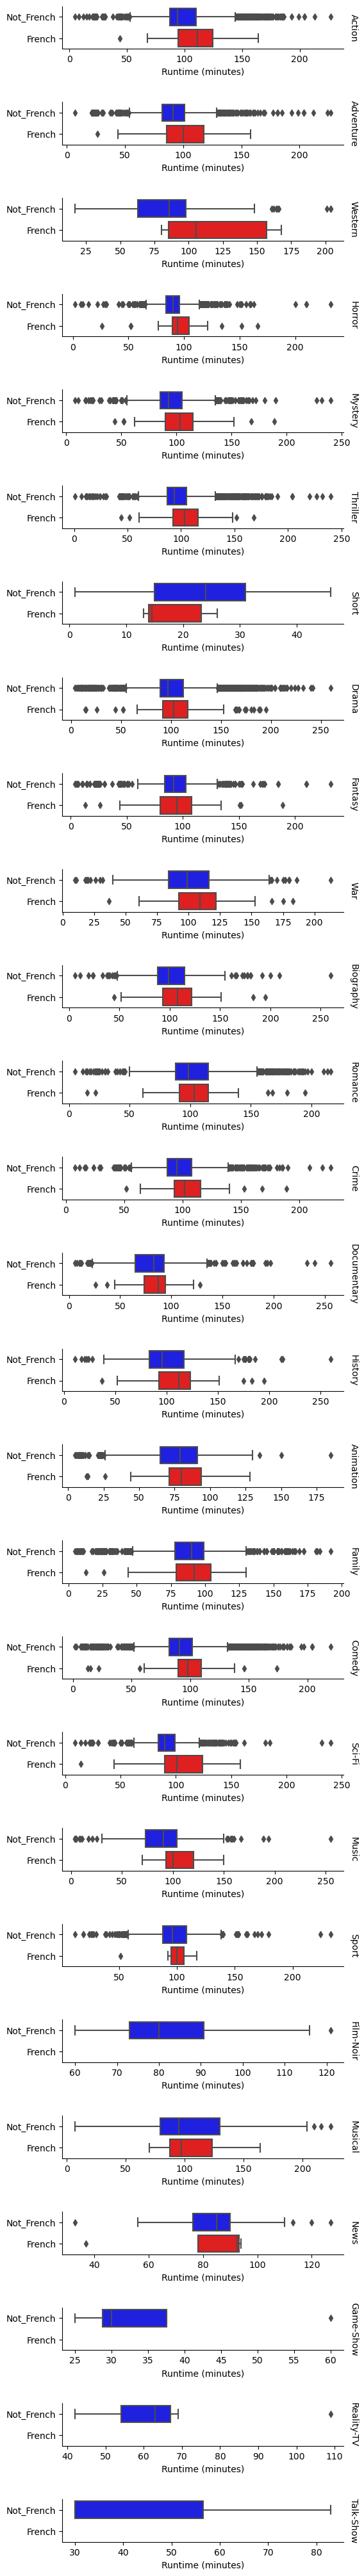

In [64]:
# Let's look at the data as box plots first: 

g = sns.catplot(data=movies6, y="Language", x="Runtime", row="Genres", 
            palette={"French": "r", "Not_French": "b"},
            kind="box", orient="h",
           sharex=False, margin_titles=True,
           height=1.5, aspect=4)

g.set(xlabel="Runtime (minutes)", ylabel="")
g.set_titles(row_template="{row_name}")

C:\Users\adamt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


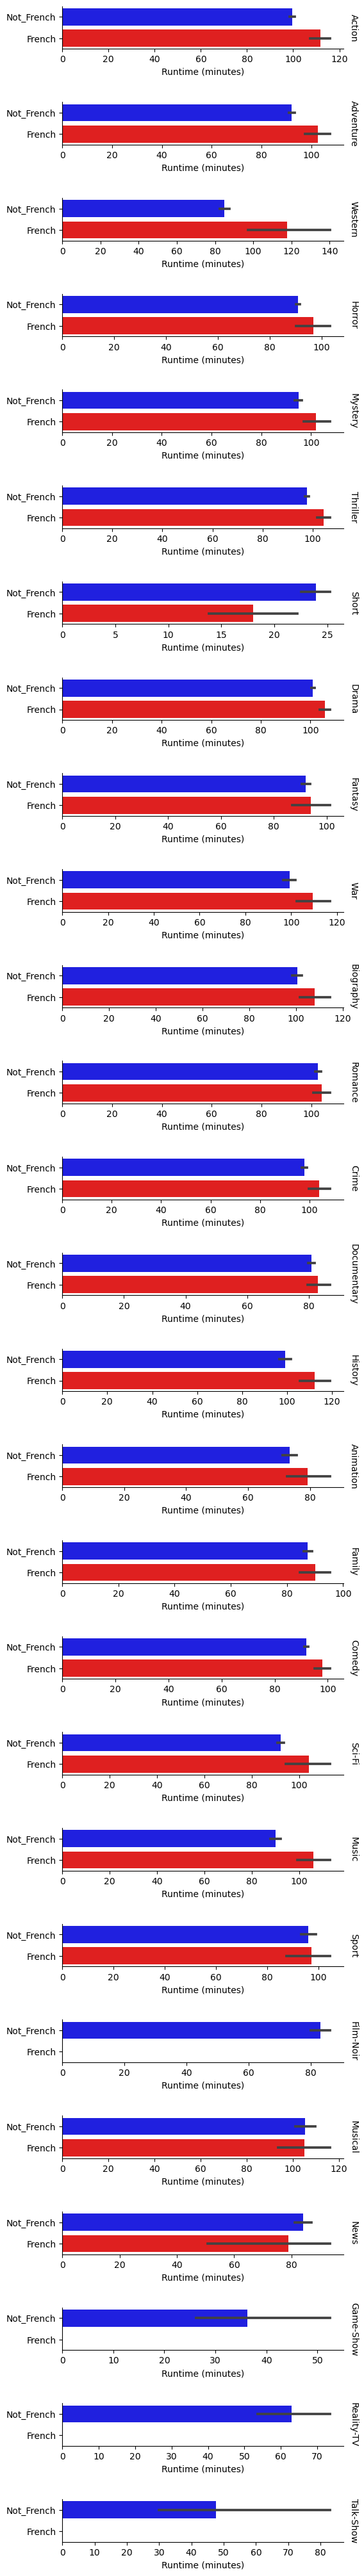

In [65]:
# Bar plots make it easier to see the results we are after: Who makes longer movies?

g1 = sns.catplot(data=movies6, y="Language", x="Runtime", row="Genres", 
            palette={"French": "r", "Not_French": "b"},
            kind="bar", orient="h",
           sharex=False, margin_titles=True,
           height=1.5, aspect=4)

g1.set(xlabel="Runtime (minutes)", ylabel="")
g1.set_titles(row_template="{row_name}")

## Compare IMDb Rating by Genre: Who makes Better Movies?

C:\Users\adamt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


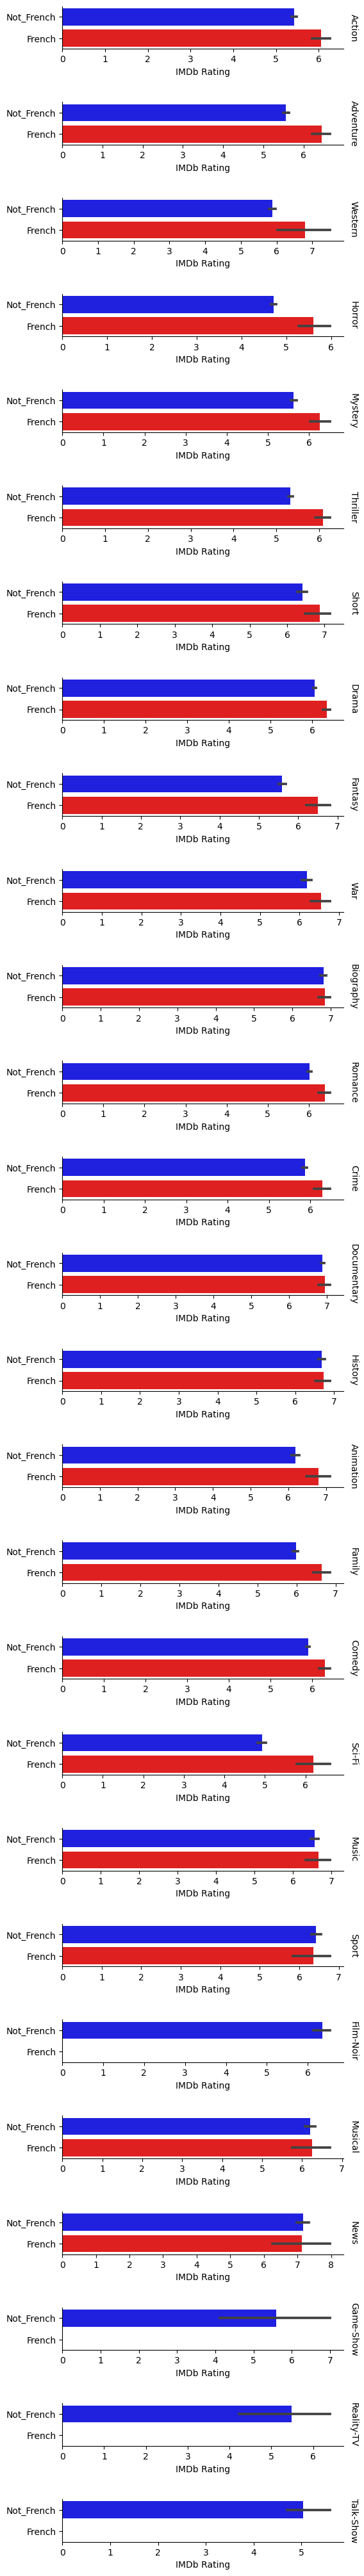

In [66]:
g2 = sns.catplot(data=movies6, y="Language", x="IMDb", row="Genres", 
            palette={"French": "r", "Not_French": "b"},
            kind="bar", orient="h",
           sharex=False, margin_titles=True,
           height=1.5, aspect=4)

g2.set(xlabel="IMDb Rating", ylabel="")
g2.set_titles(row_template="{row_name}")

In [89]:
# thanks to https://seaborn.pydata.org/tutorial/categorical.html#estimating-central-tendency

# I tried to get these two plots onto a grid to display as dashboard with y-axis shared but was unable to.
# From what I understand catplot will output its own image and will not accept an axis allocation.
# I abandoned the attempt as I was quite happy with the way the plots turned out.

On average, French movies are longer and better than non-French movies in almost every Genre category.
The exceptions are:
- French news and shorts are shorter than non-French shows
- French movies in non-fiction categories (Biography, Documentary, History, Sport, and News) are rated roughly the same as non-French shows.
- Four genre categories do not have French representation

# Visualizations with Bokeh

## Movies by Age classification

For this part of the investigation we will focus on the movies with Age information.

In [68]:
# Import the necessary libraries 
from bokeh.io import output_notebook, show 
from bokeh.plotting import figure 
from bokeh.models import FactorRange 


# Select the dataset
movies

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0
...,...,...,...,...,...,...,...,...,...,...
15064,Holiday Rush,2019,7+,4.8,NaN,Leslie Small,"Comedy,Romance",United States,English,92.0
15065,Demolition Man,1993,18+,6.7,59%,Marco Brambilla,"Action,Sci-Fi,Thriller",United States,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,13+,6.4,NaN,Selçuk Aydemir,Comedy,Turkey,Turkish,112.0
15067,Fanney Khan,2018,NaN,4.5,63%,Atul Manjrekar,"Comedy,Drama,Music",India,NaN,130.0


In [69]:
# Filter out the rows that do not contain data for Age.

df_age = movies[movies['Age'].notna()]

In [70]:
df_age

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
5,White Tiger,1996,13+,5.0,NaN,Karen Shakhnazarov,"Action,Adventure,Fantasy,War",Russia,"Russian,German",104.0
6,Path to War,2002,16+,7.3,NaN,John Frankenheimer,"Biography,Drama,War",United States,English,165.0
19,Decisions,2011,18+,3.4,NaN,Jensen LeFlore,"Action,Crime,Drama",United States,English,89.0
20,Barbie in A Mermaid Tale 2,2012,all,6.0,NaN,William Lau,"Animation,Family","Canada,United States",English,73.0
...,...,...,...,...,...,...,...,...,...,...
15061,Homeless for the Holidays,2009,all,2.8,NaN,George A. Johnson,Drama,United States,English,105.0
15063,The High Cost of Living,2011,13+,6.8,53%,Deborah Chow,Drama,Canada,"English,French,Cantonese",92.0
15064,Holiday Rush,2019,7+,4.8,NaN,Leslie Small,"Comedy,Romance",United States,English,92.0
15065,Demolition Man,1993,18+,6.7,59%,Marco Brambilla,"Action,Sci-Fi,Thriller",United States,English,115.0


In [71]:
# Consider what to do with the rest of the null values.

df_age.isnull().sum()

Title                 0
Year                  0
Age                   0
IMDb                 35
Rotten Tomatoes    3576
Directors           159
Genres               29
Country              70
Language            111
Runtime              87
dtype: int64

In [72]:
# Separate French and Not French movies.
# Note: the order is important here!
# If you replace the rows without French to 'Not_French' the string now contains French, so
# when you search for 'contains French' now all rows contain the string 'French' = all movies labelled as French.

df_age.loc[df_age["Language"].str.contains("French")==True, "Language"] = 'French'
df_age.loc[df_age["Language"].str.contains("French")!=True, "Language"] = 'Not_French'
df_age

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",Not_French,102.0
5,White Tiger,1996,13+,5.0,NaN,Karen Shakhnazarov,"Action,Adventure,Fantasy,War",Russia,Not_French,104.0
6,Path to War,2002,16+,7.3,NaN,John Frankenheimer,"Biography,Drama,War",United States,Not_French,165.0
19,Decisions,2011,18+,3.4,NaN,Jensen LeFlore,"Action,Crime,Drama",United States,Not_French,89.0
20,Barbie in A Mermaid Tale 2,2012,all,6.0,NaN,William Lau,"Animation,Family","Canada,United States",Not_French,73.0
...,...,...,...,...,...,...,...,...,...,...
15061,Homeless for the Holidays,2009,all,2.8,NaN,George A. Johnson,Drama,United States,Not_French,105.0
15063,The High Cost of Living,2011,13+,6.8,53%,Deborah Chow,Drama,Canada,French,92.0
15064,Holiday Rush,2019,7+,4.8,NaN,Leslie Small,"Comedy,Romance",United States,Not_French,92.0
15065,Demolition Man,1993,18+,6.7,59%,Marco Brambilla,"Action,Sci-Fi,Thriller",United States,Not_French,115.0


In [73]:
# Drop columns that are not required.

df2 = df_age.drop(columns=['Year', 'Rotten Tomatoes', 'Directors', 'Country'])
df2

,Title,Age,IMDb,Genres,Language,Runtime
2,Open Grave,18+,6.2,"Horror,Mystery,Thriller",Not_French,102.0
5,White Tiger,13+,5.0,"Action,Adventure,Fantasy,War",Not_French,104.0
6,Path to War,16+,7.3,"Biography,Drama,War",Not_French,165.0
19,Decisions,18+,3.4,"Action,Crime,Drama",Not_French,89.0
20,Barbie in A Mermaid Tale 2,all,6.0,"Animation,Family",Not_French,73.0
...,...,...,...,...,...,...
15061,Homeless for the Holidays,all,2.8,Drama,Not_French,105.0
15063,The High Cost of Living,13+,6.8,Drama,French,92.0
15064,Holiday Rush,7+,4.8,"Comedy,Romance",Not_French,92.0
15065,Demolition Man,18+,6.7,"Action,Sci-Fi,Thriller",Not_French,115.0


In [74]:
df2.isnull().sum()

Title        0
Age          0
IMDb        35
Genres      29
Language     0
Runtime     87
dtype: int64

In [75]:
# Replace null IMDb rating and null Runtime values with mean values.

df2['IMDb'].fillna(value=df2['IMDb'].mean().round(1), inplace=True)

In [76]:
df2['Runtime'].fillna(value=df2['Runtime'].mean().round(1), inplace=True)

In [77]:
# Drop the rows that do not contain Genre information.

df3 = df2[df2['Genres'].notna()]

In [78]:
df3

,Title,Age,IMDb,Genres,Language,Runtime
2,Open Grave,18+,6.2,"Horror,Mystery,Thriller",Not_French,102.0
5,White Tiger,13+,5.0,"Action,Adventure,Fantasy,War",Not_French,104.0
6,Path to War,16+,7.3,"Biography,Drama,War",Not_French,165.0
19,Decisions,18+,3.4,"Action,Crime,Drama",Not_French,89.0
20,Barbie in A Mermaid Tale 2,all,6.0,"Animation,Family",Not_French,73.0
...,...,...,...,...,...,...
15061,Homeless for the Holidays,all,2.8,Drama,Not_French,105.0
15063,The High Cost of Living,13+,6.8,Drama,French,92.0
15064,Holiday Rush,7+,4.8,"Comedy,Romance",Not_French,92.0
15065,Demolition Man,18+,6.7,"Action,Sci-Fi,Thriller",Not_French,115.0


In [79]:
df3.isnull().sum()

Title       0
Age         0
IMDb        0
Genres      0
Language    0
Runtime     0
dtype: int64

<Axes: xlabel='Age', ylabel='count'>

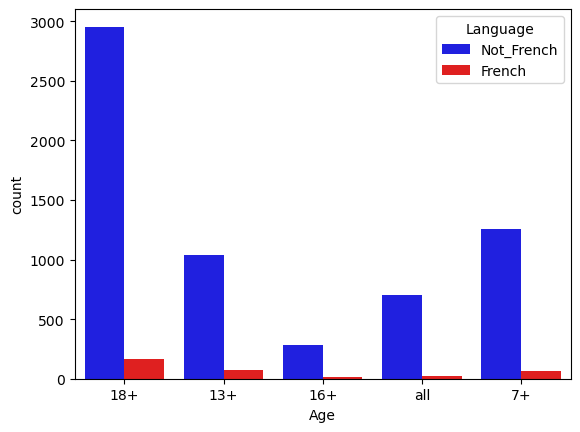

In [80]:
# Show a plot of the number of movies available in French and Not_French by Age classification.

sns.countplot(x='Age', hue="Language", data=df3, palette={"French": "r", "Not_French": "b"})

In [81]:
# Group the dataframe by Age classification and Language, obtain mean values of IMDb rating and Runtime for each.

group = df3.groupby(['Age', 'Language'])[['IMDb', 'Runtime']].mean().round(1)

group.reset_index(inplace=True)

In [82]:
group

,Age,Language,IMDb,Runtime
0,13+,French,6.8,110.5
1,13+,Not_French,6.1,102.1
2,16+,French,6.6,100.0
3,16+,Not_French,5.5,93.1
4,18+,French,6.2,109.5
5,18+,Not_French,5.6,95.8
6,7+,French,6.7,104.3
7,7+,Not_French,6.0,98.0
8,all,French,6.6,92.8
9,all,Not_French,6.1,90.5


In [83]:
# I had trouble using the Bokeh documentation to plot a bar chart using a dataframe with nested groupby.
# I found the coding needed to produce the plot I required, from:
# https://stackoverflow.com/questions/67901133/create-nested-bar-graph-in-bokeh-from-a-dataframe
# however, I was unable to find a way to change the colours of French and Not French, just the chart as a whole.
# Create a list of tuples with two strings to use for the x_range


group['x'] = group[['Age', 'Language']].apply(lambda x: (x[0], x[1]), axis=1)

In [84]:
group

,Age,Language,IMDb,Runtime,x
0,13+,French,6.8,110.5,"(13+, French)"
1,13+,Not_French,6.1,102.1,"(13+, Not_French)"
2,16+,French,6.6,100.0,"(16+, French)"
3,16+,Not_French,5.5,93.1,"(16+, Not_French)"
4,18+,French,6.2,109.5,"(18+, French)"
5,18+,Not_French,5.6,95.8,"(18+, Not_French)"
6,7+,French,6.7,104.3,"(7+, French)"
7,7+,Not_French,6.0,98.0,"(7+, Not_French)"
8,all,French,6.6,92.8,"(all, French)"
9,all,Not_French,6.1,90.5,"(all, Not_French)"


In [85]:
# Create a plot using Bokeh to display comparison of mean IMDb ratings for French and Not_French movies by Age classification

from bokeh.models.tools import HoverTool

# Enable the hover tool.
tools = "hover,save,pan,box_zoom,reset,wheel_zoom,help"

p = figure(title="Mean IMDb Rating by Age Class and Language",
    x_range=FactorRange(*list(group["x"])),
    width=900, tools=tools)

p.vbar(
    x="x",
    top="IMDb",
    width=0.9,
    source=group,
    )

# Locate the HoverTool instance.
hover = p.select(dict(type=HoverTool))
hover.tooltips = [("Age Class", "@Age"),
                  ("Language", "@Language"),
                  ("mean IMDb rating", "@IMDb")
                  ]

output_notebook()

Loading BokehJS ...

In [86]:
# Create a plot using Bokeh to display comparison of mean Runtime for French and Not_French movies by Age classification
# Link the x-axis to the plot for mean ratings, this will allow for visual display of rating and runtime together in dashboard

p1 = figure(title="Mean Runtime by Age Class and Language",
    x_range=p.x_range,
    width=900, tools=tools)

p1.vbar(
    x="x",
    top="Runtime",
    width=0.9,
    source=group,
    color=
    'red'
    )

# Locate the HoverTool instance.
hover = p1.select(dict(type=HoverTool))
hover.tooltips = [("Age Class", "@Age"),
                  ("Language", "@Language"),
                  ("mean Runtime", "@Runtime")
                  ]

output_notebook()

Loading BokehJS ...

# Create Dashboard

In [87]:
# Import Bokeh layouts

from bokeh.layouts import column

# Arrange the plots into a single column.

c1 = column(p,
            p1
            )

# View the figure.
show(c1)

# Bokeh serve

In [88]:
# Import the library to use bokeh serve.
from bokeh.plotting import curdoc

# Add the plot as root object for the current document.
curdoc().add_root(c1)

# To test this code
# Downloaded file as Python (.py)
# File saved in Downloads folder.
# Uploaded Python file to jupyter notebook directory
# Opened terminal for command prompt from Anaconda Navigator
# executed command:
# bokeh serve --show Assignment_2_Adam_Thomas.py
# plot c1 appeared in new window, same as displayed above in this notebook
# hovertool active, x-axes linked for the two plots